In [28]:
# importing packages
import argparse
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection 
from sklearn import ensemble 
from utilities import visualize_classifier
%matplotlib inline

In [14]:
# Defining an argument parser function to take in argument so as to determine if it is a random forest or an extremely random forests we trying to use
def arg_build():
    the_parser = argparse.ArgumentParser(description='Classify data using \
Ensemble Learning techniques')
    the_parser.add_argument('--classifier-type', dest='classifier_type',
required=True, choices=['rf', 'erf'], help="Type of classifier to use; can be either 'rf' or 'erf'")
    return the_parser

In [62]:
# defining the main function and parsing the arguments
# note thatin this code i have already declared the type of the classifier i want to work on
# and i have initialized it argument in my parse_args fucntion
if __name__ == '__main__':
    args = arg_build().parse_args(['--classifier-type', 'erf'])
    classifier_type = args.classifier_type

In [16]:
# loading the input data
input_file = 'data_random_forests.txt'
data = np.loadtxt(input_file, delimiter=',')

# reading the data
X,Y = data[:,  :-1], data[:, -1]

In [17]:
# separating the data into three classes based on their target labels
class_0 = np.array(X[Y==0])
class_1 = np.array(X[Y==1])
class_2 = np.array(X[Y==2])

Text(0.5,1,'Input data')

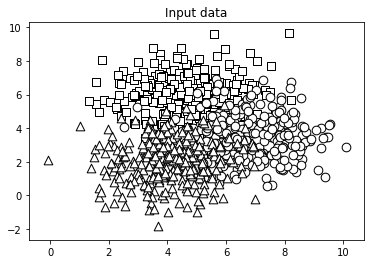

In [18]:
# visualizing our input data
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='white',
edgecolors='black', linewidth=1, marker='s')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white',
edgecolors='black', linewidth=1, marker='o')
plt.scatter(class_2[:, 0], class_2[:, 1], s=75, facecolors='white',
edgecolors='black', linewidth=1, marker='^')
plt.title('Input data')

In [44]:
# now splitting our datasets into training and testing dataset
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size=0.25, random_state=5)

In [57]:
print(len(X_train), len(Y_train))
print(len(X_test), len(Y_test))
print(len(X), len(Y))
#for i in range(len(X_test)):
#    print(X_test[i],'--->', Y_test[i])

675 675
225 225
900 900


In [63]:
# creating the ensemble learning classifier
# declaring the parameters of the ensemble learning classifier
# n_estimator refers to the number of trees that will be constructed
# max_depth refers to the maximum numbers of levels in each tree
# random_state refers to the seed value of the random number generator needed to initialize the random forest classifier algorithm
params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}

# creating the model object either random forests or extreme random forest
if classifier_type == 'rf':
    classifier = ensemble.RandomForestClassifier(**params)
else:
    classifier = ensemble.ExtraTreesClassifier(**params)


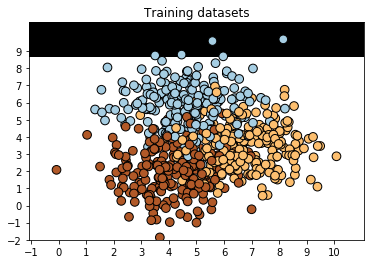

In [70]:
# training the classifier with the training sets of the data
classifier.fit(X_train, Y_train)

# visualizing the training dataset using the visualize_classifier
# imported from utilities
visualize_classifier(classifier, X_train,Y_train, 'Training datasets')

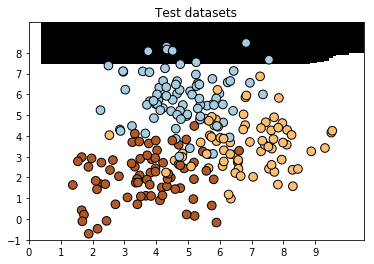

In [72]:
# predicting the output of Y when test dataset was used
# checking if it will be really be the same as the real value of Y that we already have
Y_test_predict = classifier.predict(X_test)
#for i in range(len(data)):
#    print(X_test[i],'--->', Y_test_predict[i])
# visualizing the 
visualize_classifier(classifier, X_test, Y_test, 'Test datasets')

In [68]:
# evaluating the perfomance of the classifier on the training datasets
class_names = ['class-0', 'class-1', 'class-2']
print("\n" + "#"*40)
print("\nClassifier performance on training dataset\n")
print(metrics.classification_report(Y_train, classifier.predict(X_train),target_names=class_names))
print("#"*40 + "\n")

# evaluating the perfomance of the classifier on the training datasets
print("#"*40)
print("\nClassifier performance on test dataset\n")
print(metrics.classification_report(Y_test, Y_test_predict,
target_names=class_names))
print("#"*40 + "\n")


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     class-0       0.89      0.83      0.86       221
     class-1       0.82      0.84      0.83       230
     class-2       0.83      0.86      0.85       224

    accuracy                           0.85       675
   macro avg       0.85      0.85      0.85       675
weighted avg       0.85      0.85      0.85       675

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     class-0       0.92      0.85      0.88        79
     class-1       0.84      0.84      0.84        70
     class-2       0.85      0.92      0.89        76

    accuracy                           0.87       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225

###########################

In [96]:
# estimating the confidence measure of the predictions
# we shall be letting our model predict the class of the data we give it
# and also be estimating the confidence levels of the preiction
test_datapoints = np.array([[5, 5], [3, 6], [6, 4], [7, 2], [4, 4],
[5, 2],[8.11,3.58]])

print("\nConfidence measure:")
for datapoint in test_datapoints:
    probabilities = classifier.predict_proba([datapoint])[0]
    predicted_class = 'Class-' + str(np.argmax(probabilities)) # np.argmax returns the index of the max value of the values in the array
    print('\nDatapoint:', datapoint)
    print('Probabilities:', probabilities)
    print('Predicted class:', predicted_class)


Confidence measure:

Datapoint: [5. 5.]
Probabilities: [0.48904419 0.28020114 0.23075467]
Predicted class: Class-0

Datapoint: [3. 6.]
Probabilities: [0.66707383 0.12424406 0.20868211]
Predicted class: Class-0

Datapoint: [6. 4.]
Probabilities: [0.25788769 0.49535144 0.24676087]
Predicted class: Class-1

Datapoint: [7. 2.]
Probabilities: [0.10794013 0.6246677  0.26739217]
Predicted class: Class-1

Datapoint: [4. 4.]
Probabilities: [0.33383778 0.21495182 0.45121039]
Predicted class: Class-2

Datapoint: [5. 2.]
Probabilities: [0.18671115 0.28760896 0.52567989]
Predicted class: Class-2

Datapoint: [8.11 3.58]
Probabilities: [0.13815652 0.71875187 0.1430916 ]
Predicted class: Class-1


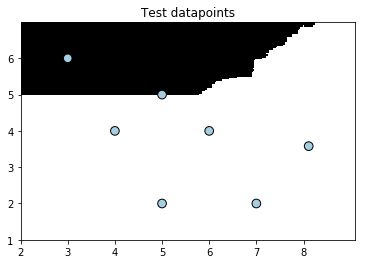

In [93]:
# Visualize the datapoints based on classifier boundaries
y = [0]*len(test_datapoints)
visualize_classifier(classifier, test_datapoints,y,'Test datapoints')
plt.show()